In [ ]:

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [ ]:
#Conert into datetime format
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

org_col_names=["No", "year","month", "day", "hour", "pm2.5", "DEWP","TEMP", "PRES", "cbwd", "Iws", "Is", "Ir"]
col_names = ['pollution', 'dew', 'temp', 'pressure', 'w_dir', 'w_speed', 'snow', 'rain']


In [ ]:
dataset = pd.read_csv('AirPollution.csv',index_col=0, date_parser=parse,parse_dates=[['year', 'month', 'day', 'hour']])


In [ ]:
dataset.head()

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
# Data cleaning
dataset.drop('No', axis=1, inplace=True)
dataset.columns = col_names
dataset['pollution'].fillna(0, inplace=True)
dataset = dataset[24:]
print(dataset.head(5))
dataset.to_csv('pollution.csv')

                     pollution  dew  temp  pressure w_dir  w_speed  snow  rain
year_month_day_hour                                                           
2010-01-02 00:00:00      129.0  -16  -4.0    1020.0    SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0    1020.0    SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0    1021.0    SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0    1022.0    SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0    1022.0    SE     6.25     2     0


In [ ]:


df = pd.read_csv('pollution.csv', header=0, index_col=0)
df.describe()

,pollution,dew,temp,pressure,w_speed,snow,rain
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,94.013516,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023
std,92.252276,14.429326,12.193384,10.271411,50.022729,0.760582,1.416247
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,24.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,68.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,132.250000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


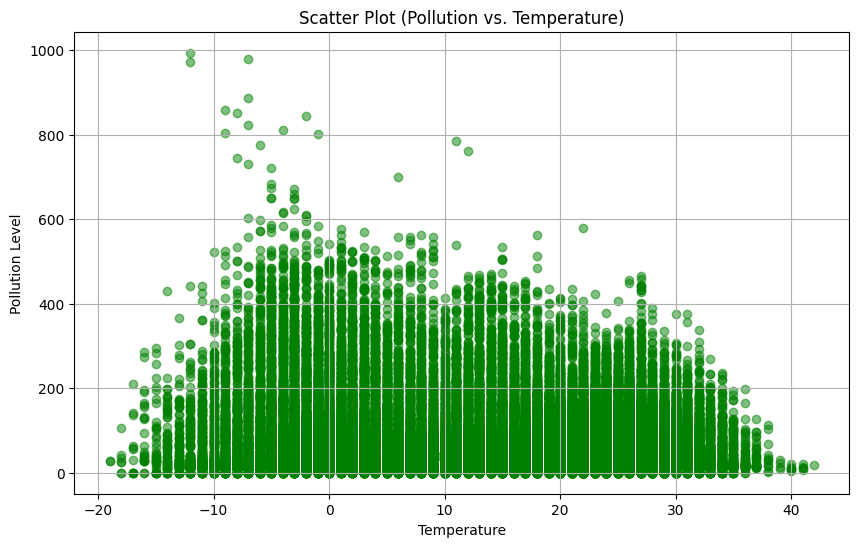

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(df['temp'], df['pollution'], color='green', alpha=0.5)
plt.title('Scatter Plot (Pollution vs. Temperature)')
plt.xlabel('Temperature')
plt.ylabel('Pollution Level')
plt.grid(True)
plt.show()


In [ ]:
dataset_columns = df.columns.tolist()
dataset_columns

['pollution', 'dew', 'temp', 'pressure', 'w_dir', 'w_speed', 'snow', 'rain']

In [ ]:

df = df.drop(['dew', 'temp', 'pressure', 'w_dir', 'w_speed', 'snow', 'rain'],axis = 1)
df.head()

,pollution
year_month_day_hour,
2010-01-02 00:00:00,129.0
2010-01-02 01:00:00,148.0
2010-01-02 02:00:00,159.0
2010-01-02 03:00:00,181.0
2010-01-02 04:00:00,138.0


<Axes: >

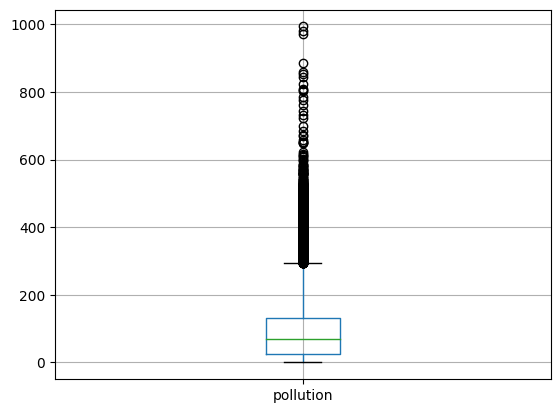

In [ ]:

df.boxplot()

In [ ]:

from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [ ]:

scaled_dataset[:2,:]

array([[0.12977867],
       [0.14889336]])

In [ ]:

def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])

  return X,Y

In [ ]:

X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)


Y (43796, 1)
X (43796, 4, 1)


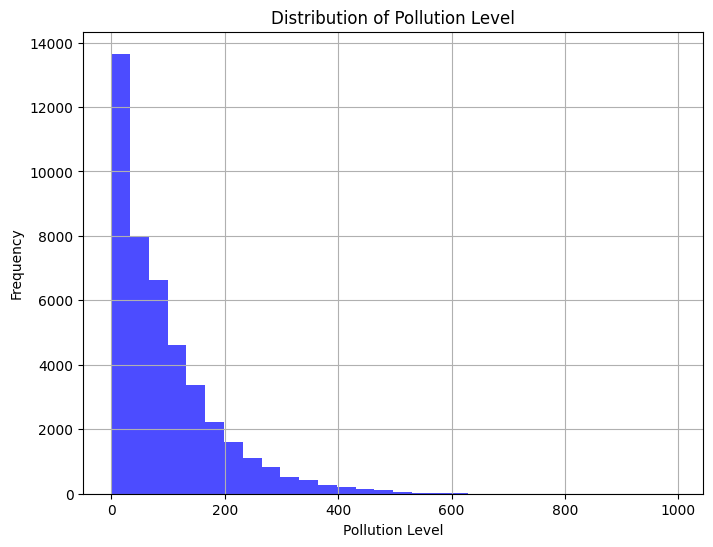

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['pollution'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Pollution Level')
plt.xlabel('Pollution Level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

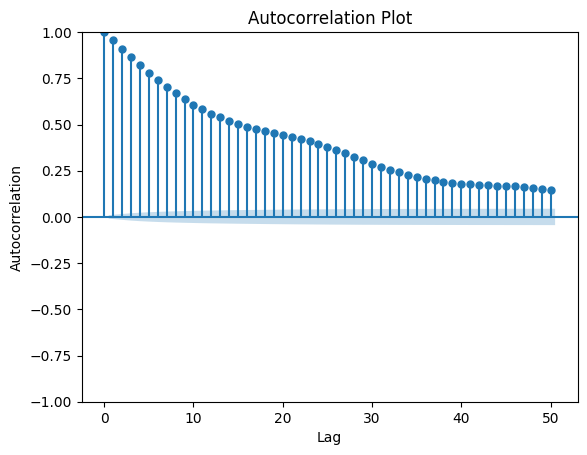

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['pollution'], lags=50)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


In [ ]:

n_train = 24*365
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (35036, 4, 1)
X_test (8760, 4, 1)
Y_train (35036, 1)
Y_test (8760, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

model = LinearRegression()
model.fit(X_train_2d, Y_train)

Y_pred = model.predict(X_test_2d)

# mse = mean_squared_error(Y_test, Y_pred)
# print("Mean Squared Error (MSE) :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

r_squared = r2_score(Y_test, Y_pred)
print("R-squared (R²):", r_squared)

mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error (MAE):", mae)

Root Mean Squared Error (RMSE): 0.03126179635019244
R-squared (R²): 0.8880925398637496
Mean Absolute Error (MAE): 0.014278093035403014


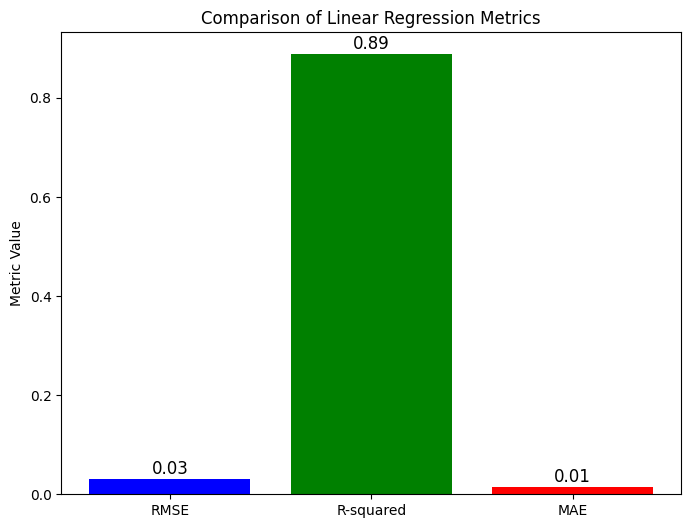

In [ ]:
import matplotlib.pyplot as plt


metrics = [ 'RMSE', 'R-squared', 'MAE']
values = [ rmse, r_squared, mae]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'orange'])
plt.ylabel('Metric Value')
plt.title('Comparison of Linear Regression Metrics')

for i in range(len(metrics)):
    plt.text(i, values[i] + 0.002, f'{values[i]:.2f}', ha='center', va='bottom', fontsize=12)

plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

model = DecisionTreeRegressor()
model.fit(X_train_2d, Y_train)

Y_pred = model.predict(X_test_2d)

# mse = mean_squared_error(Y_test, Y_pred)
# print("Mean Squared Error (MSE) :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

r_squared = r2_score(Y_test, Y_pred)
print("R-squared (R²):", r_squared)

mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error (MAE):", mae)

Root Mean Squared Error (RMSE): 0.03126179635019244
R-squared (R²): 0.8213435759311456
Mean Absolute Error (MAE): 0.021263768668051186


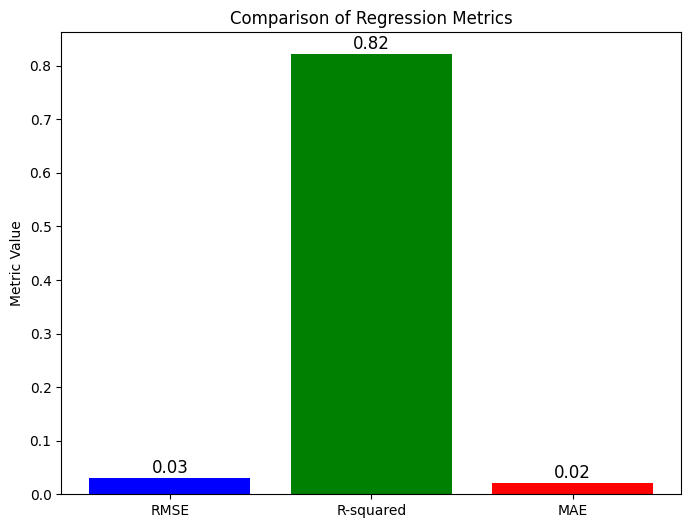

In [ ]:
import matplotlib.pyplot as plt


metrics = ['RMSE', 'R-squared', 'MAE']
values = [ rmse, r_squared, mae]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'orange'])
plt.ylabel('Metric Value')
plt.title('Comparison of Regression Metrics')

for i in range(len(metrics)):
    plt.text(i, values[i] + 0.002, f'{values[i]:.2f}', ha='center', va='bottom', fontsize=12)

plt.show()


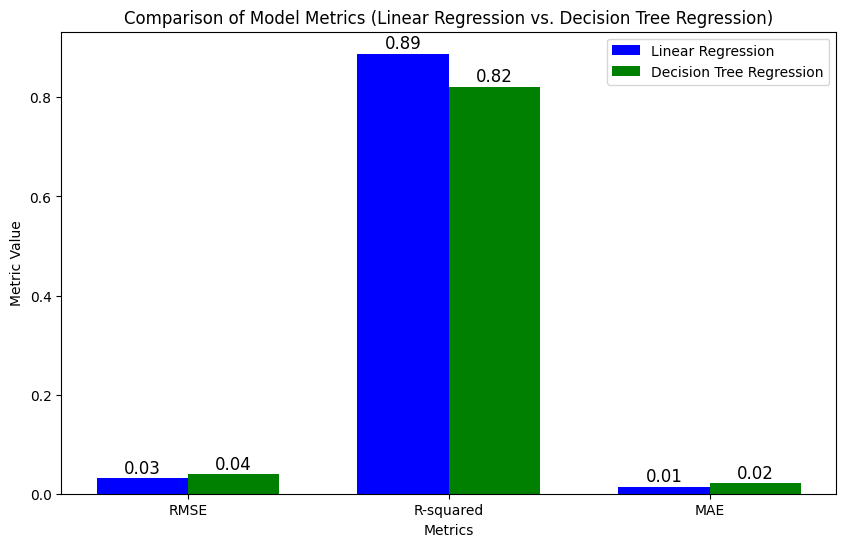

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

metrics = ['RMSE', 'R-squared', 'MAE']
model1_metrics = []  
model2_metrics = []  

model1 = LinearRegression()
model1.fit(X_train_2d, Y_train)
Y_pred1 = model1.predict(X_test_2d)
model1_metrics.append(np.sqrt(mean_squared_error(Y_test, Y_pred1)))
model1_metrics.append(r2_score(Y_test, Y_pred1))
model1_metrics.append(mean_absolute_error(Y_test, Y_pred1))

model2 = DecisionTreeRegressor()
model2.fit(X_train_2d, Y_train)
Y_pred2 = model2.predict(X_test_2d)
model2_metrics.append(np.sqrt(mean_squared_error(Y_test, Y_pred2)))
model2_metrics.append(r2_score(Y_test, Y_pred2))
model2_metrics.append(mean_absolute_error(Y_test, Y_pred2))

bar_width = 0.35

# Create an array of indices for the x-axis
x = np.arange(len(metrics))

plt.figure(figsize=(10, 6))

plt.bar(x - bar_width/2, model1_metrics, bar_width, label='Linear Regression', color='blue')

plt.bar(x + bar_width/2, model2_metrics, bar_width, label='Decision Tree Regression', color='green')

plt.xlabel('Metrics')
plt.ylabel('Metric Value')
plt.title('Comparison of Model Metrics (Linear Regression vs. Decision Tree Regression)')
plt.xticks(x, metrics)

for i in range(len(metrics)):
    plt.text(x[i] - bar_width/2, model1_metrics[i] + 0.002, f'{model1_metrics[i]:.2f}', ha='center', va='bottom', fontsize=12)

for i in range(len(metrics)):
    plt.text(x[i] + bar_width/2, model2_metrics[i] + 0.002, f'{model2_metrics[i]:.2f}', ha='center', va='bottom', fontsize=12)

plt.legend()

plt.show()


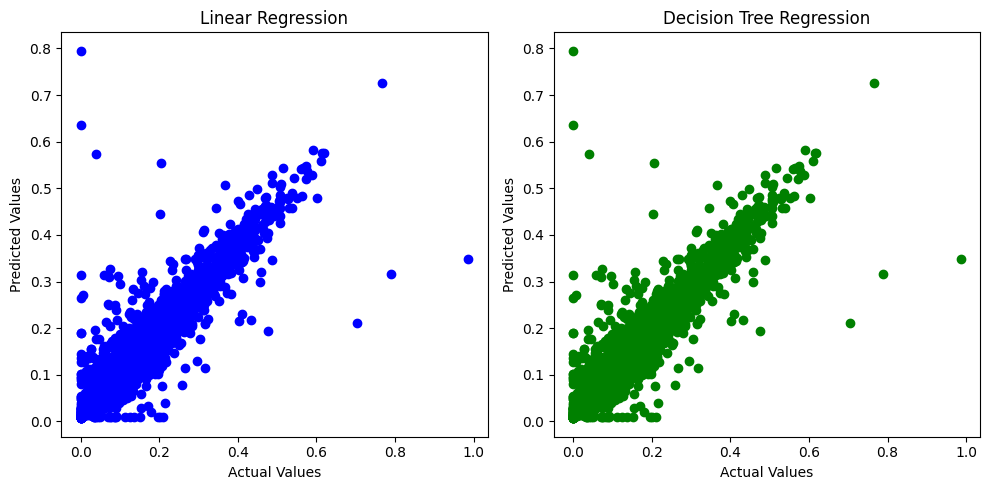

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(Y_test, Y_pred, color='blue')
plt.title("Linear Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_pred, color='green')
plt.title("Decision Tree Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()


In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:

model.fit(X_train, Y_train, epochs = 20, batch_size = 32)

Epoch 1/20
1095/1095 [==============================] - 26s 18ms/step - loss: 0.0017
Epoch 2/20
1095/1095 [==============================] - 14s 13ms/step - loss: 8.7234e-04
Epoch 3/20
1095/1095 [==============================] - 13s 12ms/step - loss: 8.7110e-04
Epoch 4/20
1095/1095 [==============================] - 13s 12ms/step - loss: 8.5954e-04
Epoch 5/20
1095/1095 [==============================] - 14s 13ms/step - loss: 8.6009e-04
Epoch 6/20
1095/1095 [==============================] - 13s 12ms/step - loss: 8.4276e-04
Epoch 7/20
1095/1095 [==============================] - 13s 12ms/step - loss: 8.1724e-04
Epoch 8/20
1095/1095 [==============================] - 14s 13ms/step - loss: 8.2898e-04
Epoch 9/20
1095/1095 [==============================] - 13s 12ms/step - loss: 8.2431e-04
Epoch 10/20
1095/1095 [==============================] - 13s 12ms/step - loss: 8.2564e-04
Epoch 11/20
1095/1095 [==============================] - 13s 12ms/step - loss: 8.2545e-04
Epoch 12/20
1095/1095 [

In [ ]:
#Taking predictions
Y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)

rmse = np.sqrt(mse)
rmse

274/274 [==============================] - 3s 5ms/step


0.02974061380783407

In [ ]:
print('y_predicted',Y_pred.shape)
print('X_test' ,X_test.shape)
print('scaled Values shape', scaled_dataset.shape)

y_predicted (8760, 1)
X_test (8760, 4, 1)
scaled Values shape (43800, 1)


In [ ]:
#Scaling back to the original scale
d = scaled_dataset[:8760,:]
print('dummy',d.shape)
print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d[:8760,1:]), axis =1)
print('concat y_pred',Y_pred.shape)
Y_tested = np.concatenate((Y_test, d[:8760,1:]), axis = 1)
print('concat Y_test', Y_test.shape)

dummy (8760, 1)
Y_pred (8760, 1)
concat y_pred (8760, 1)
concat Y_test (8760, 1)


In [ ]:

#Take inverse transform
Y_predicted = scaler.inverse_transform(Y_predicted)
Y_tested = scaler.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (8760, 1)
Y_predicted (8760, 1)


In [ ]:
#Calculate error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)

rmse = np.sqrt(mse)
rmse

29.562170124987063

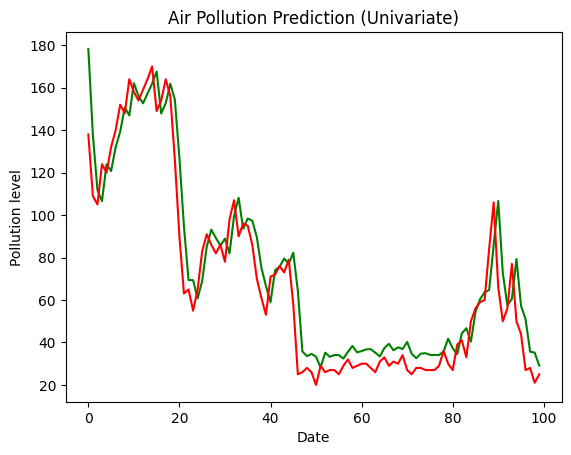

In [ ]:
#Plot the graph between actual vs predicted values
plt.plot(Y_predicted[:100,:], color= 'green')
plt.plot(Y_tested[:100,:] , color = 'red')
plt.title("Air Pollution Prediction (Univariate)")
plt.xlabel("Date")
plt.ylabel("Pollution level")
plt.show()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
print('MAPE', mape)

MAPE inf


<ipython-input-32-b85ca2e8cc51>:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

r_squared = r2_score(Y_tested, Y_predicted)
print("R-squared (R²):", r_squared)

mae = mean_absolute_error(Y_tested, Y_predicted)
print("Mean Absolute Error (MAE):", mae)

mean_test_data = np.mean(Y_tested)
print("Mean of Test data:", mean_test_data)


Root Mean Squared Error (RMSE): 29.562170124987063
R-squared (R²): 0.8987182877286313
Mean Absolute Error (MAE): 15.49916090064227
Mean of Test data: 96.04143835616438


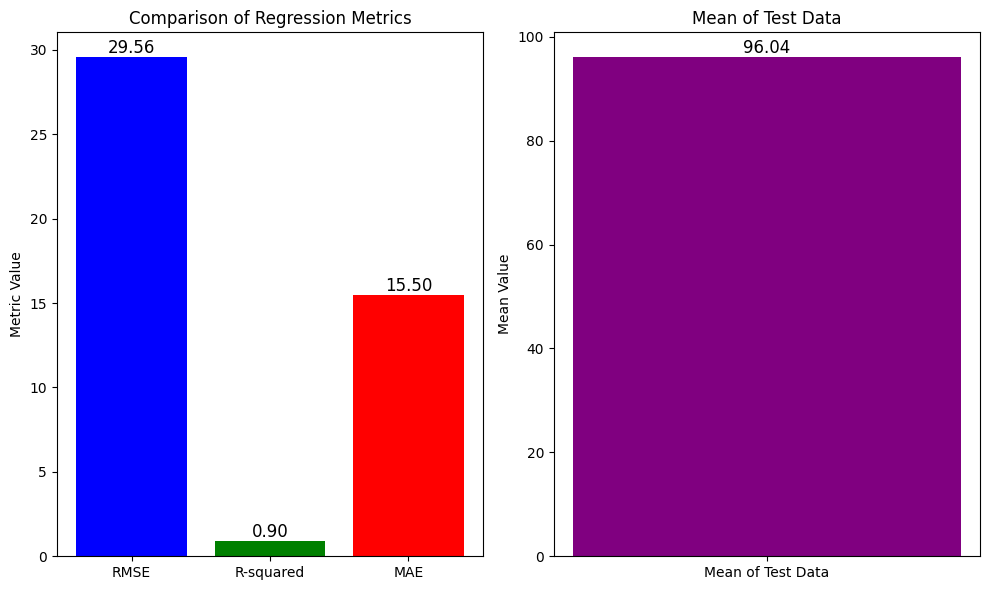

In [ ]:
import matplotlib.pyplot as plt

# Metric values
metrics = [ 'RMSE', 'R-squared', 'MAE']
values =  [rmse, r_squared, mae]

# Create a bar chart to compare the metrics
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(metrics, values, color=['blue', 'green', 'red', 'orange'])
plt.ylabel('Metric Value')
plt.title('Comparison of Regression Metrics')

# Add text labels to the bars in the first chart
for i in range(len(metrics)):
    plt.text(i, values[i] + 0.002, f'{values[i]:.2f}', ha='center', va='bottom', fontsize=12)

# Mean of test data
plt.subplot(1, 2, 2)
plt.bar('Mean of Test Data', mean_test_data, color='purple')
plt.ylabel('Mean Value')
plt.title('Mean of Test Data')
plt.text(0, mean_test_data + 0.002, f'{mean_test_data:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:

from keras.models import load_model
model.save('AirPollutionMultivariate.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_true = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
y_scores = np.array([0.2, 0.7, 0.8, 0.3, 0.9, 0.1, 0.2, 0.7, 0.85, 0.15])


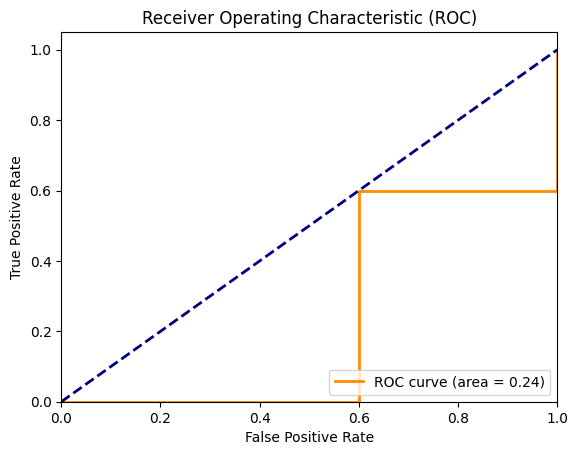

ROC AUC Score: 0.24


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


roc_auc_score_value = roc_auc_score(y_true, y_scores)
print(f'ROC AUC Score: {roc_auc_score_value:.2f}')
